<a href="https://colab.research.google.com/github/akshziitj/voice-activity-detection-su20/blob/main/M23CSA503/Q2/Q2-Task-B/SU_Assignment01_Q2_Task_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import soundfile as sf
import os

# Define the target directory
target_folder = "/content/audio_files"

# Create the directory if it does not exist
os.makedirs(target_folder, exist_ok=True)

# Load built-in sample audio from Librosa
y_classical, sr_classical = librosa.load(librosa.ex('trumpet'))
y_rock, sr_rock = librosa.load(librosa.ex('brahms'))
y_hiphop, sr_hiphop = librosa.load(librosa.ex('choice'))
y_electronic, sr_electronic = librosa.load(librosa.ex('vibeace'))

# Save the audio files inside the folder
sf.write(f"{target_folder}/classical.wav", y_classical, sr_classical)
sf.write(f"{target_folder}/rock.wav", y_rock, sr_rock)
sf.write(f"{target_folder}/hiphop.wav", y_hiphop, sr_hiphop)
sf.write(f"{target_folder}/electronic.wav", y_electronic, sr_electronic)

print(f"Audio files saved successfully in {target_folder}")

Audio files saved successfully in /content/audio_files


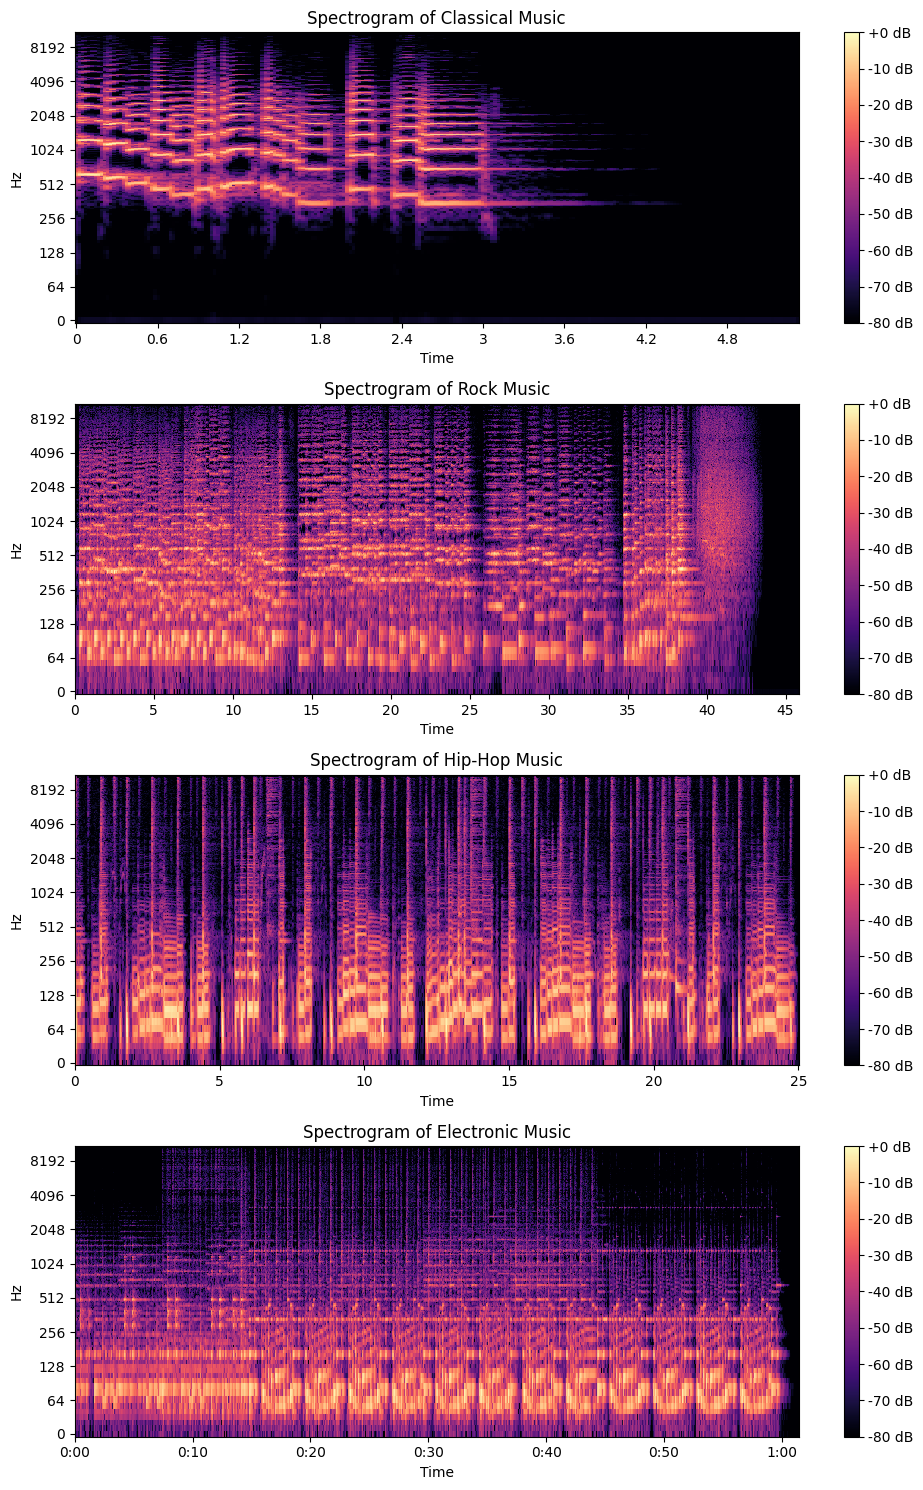

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Define local file paths (inside /content/audio_files/)
audio_folder = "/content/audio_files/"
songs = {
    "Classical": "classical.wav",
    "Rock": "rock.wav",
    "Hip-Hop": "hiphop.wav",
    "Electronic": "electronic.wav"
}

# Ensure numpy uses complex128 to avoid the deprecated error
np_complex = np.complex128

# Check if files exist before proceeding
missing_files = [song for song in songs.values() if not os.path.exists(os.path.join(audio_folder, song))]

if missing_files:
    print(f" Missing files: {missing_files}")
    print(" Please upload the missing files to /content/audio_files/ before running the code.")
else:
    # Generate spectrograms for each genre
    fig, axes = plt.subplots(4, 1, figsize=(10, 15))

    for idx, (genre, song_path) in enumerate(songs.items()):
        try:
            # Load the audio file from /content/audio_files/
            file_path = os.path.join(audio_folder, song_path)
            y, sr = librosa.load(file_path, sr=22050)

            # Compute the spectrogram using STFT
            D = librosa.amplitude_to_db(np.abs(librosa.stft(y).astype(np_complex)), ref=np.max)

            # Plot the spectrogram
            ax = axes[idx]
            img = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=ax)
            ax.set_title(f"Spectrogram of {genre} Music")
            fig.colorbar(img, ax=ax, format="%+2.0f dB")

        except Exception as e:
            print(f"Error processing {genre}: {e}")

    plt.tight_layout()
    plt.show()